<a href="https://colab.research.google.com/github/Arvind-Khoda/ML_Exp/blob/main/Exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
!pip install klib
#Importing Required Libraries
import numpy as np
import pandas as pd
import klib
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [149]:
#Importing Dataset
data=pd.read_csv("/content/data_science_job.csv")

GridSpec(6, 6)

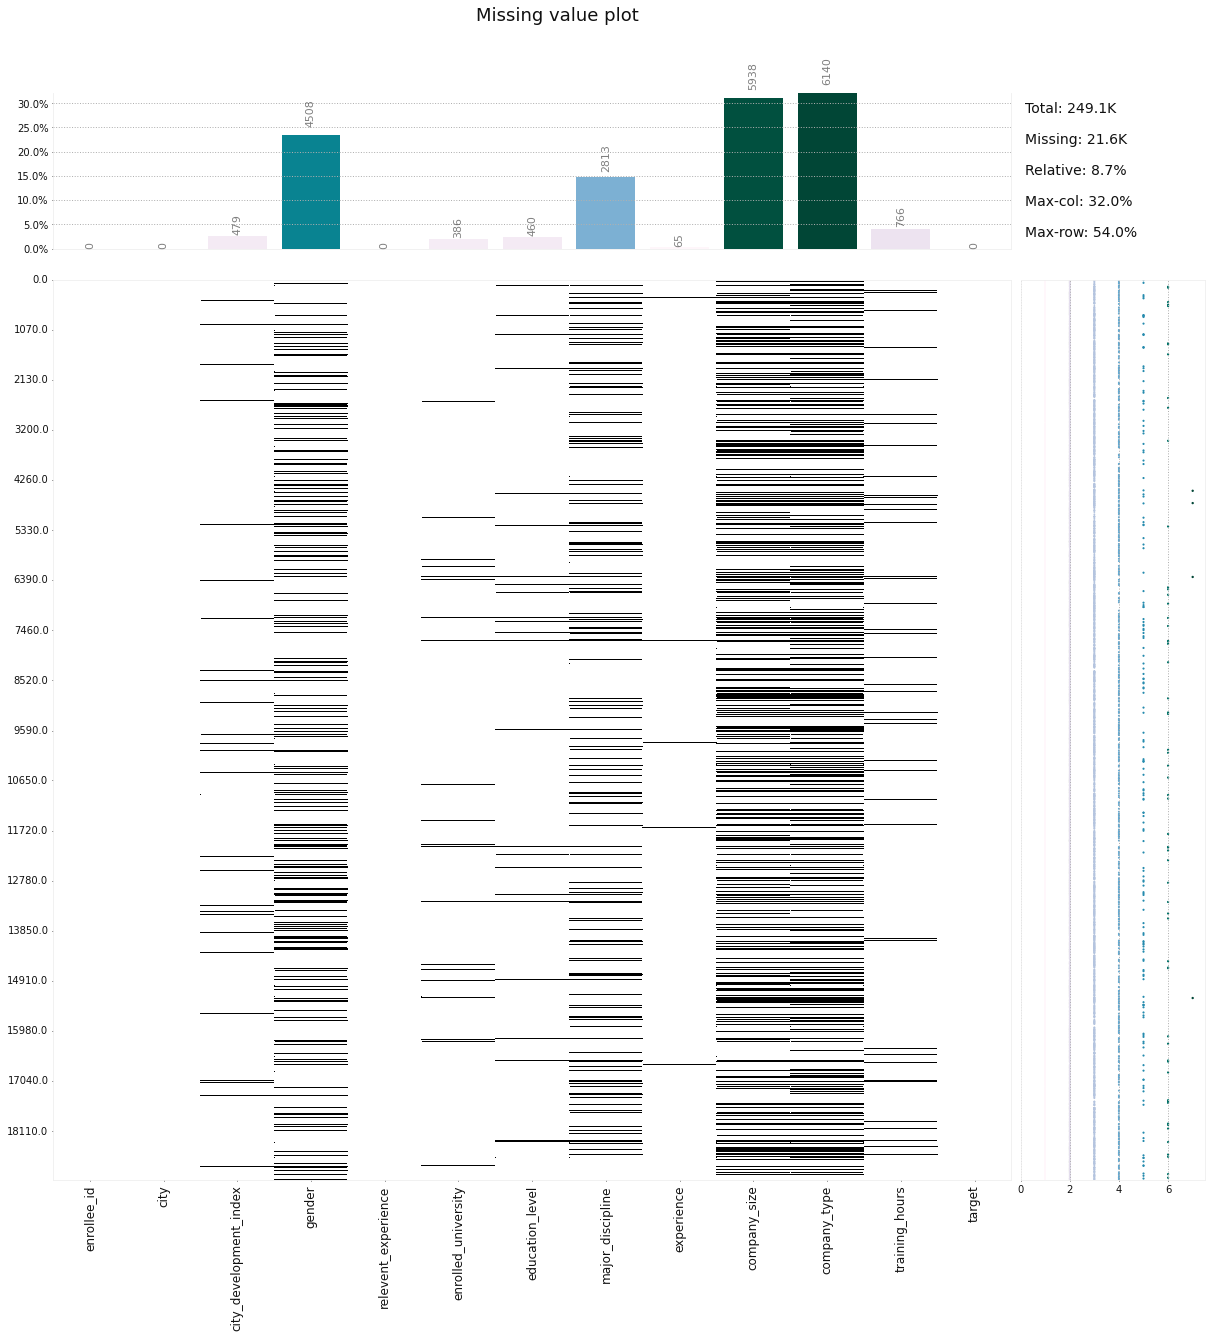

In [150]:
#Visualizing missing values using graphs
klib.missingval_plot(data)

In [151]:
#Finding Null Values By using isnull method
data.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [153]:
#Finding Columns In which less than 5% data is missing
col_5=[]
for col in data.columns:
  if data[col].isnull().mean()<=0.05 and data[col].isnull().mean()>0:
    col_5.append(col)

In [154]:
#Removing Rows having missing data less 5%
#Removing missing value using dropna method
data.dropna(subset=col_5,inplace=True)

In [155]:
#Again Checking for missing data
data.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    22.541031
relevent_experience        0.000000
enrolled_university        0.000000
education_level            0.000000
major_discipline          12.530555
experience                 0.000000
company_size              29.786986
company_type              30.799674
training_hours             0.000000
target                     0.000000
dtype: float64

In [156]:
#Handling missing value more than 5% null


In [157]:
data['education_level']=data['education_level'].dropna()

In [158]:
data['education_level'].isnull().sum()

0

In [159]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3873
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2153
experience                   0
company_size              5118
company_type              5292
training_hours               0
target                       0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


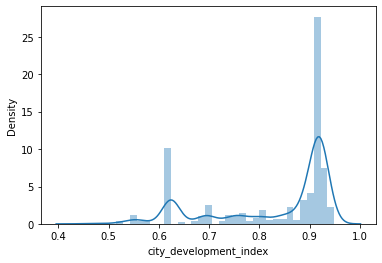

In [160]:
sns.distplot(data['city_development_index'])

In [161]:
#Conclusion
data['city_development_index'].skew()
#Data is skewed so we will fill using median

-1.0335406418289128

In [162]:
#Filling value via Median
median_cdi=data['city_development_index'].median()
data['city_development_index'].fillna(median_cdi,inplace=True)

In [163]:
#Fillling value via Mode
major_mode=data['major_discipline'].mode()[0]
data['major_discipline'].fillna(major_mode,inplace=True)

In [164]:
#Filling value any value
data['gender'].replace(np.nan,'Missing',inplace=True)
data['company_size'].replace(np.nan,'Missing',inplace=True)
data['company_type'].replace(np.nan,'Missing',inplace=True)

In [165]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
training_hours            0
target                    0
dtype: int64

In [166]:
#Now all missing value are removed

In [167]:
data.duplicated().sum()

0

In [168]:
#Encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17182 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             17182 non-null  int64  
 1   city                    17182 non-null  object 
 2   city_development_index  17182 non-null  float64
 3   gender                  17182 non-null  object 
 4   relevent_experience     17182 non-null  object 
 5   enrolled_university     17182 non-null  object 
 6   education_level         17182 non-null  object 
 7   major_discipline        17182 non-null  object 
 8   experience              17182 non-null  float64
 9   company_size            17182 non-null  object 
 10  company_type            17182 non-null  object 
 11  training_hours          17182 non-null  float64
 12  target                  17182 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.8+ MB


In [169]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
L_encoder=LabelEncoder()
OHE=OneHotEncoder(drop='first')
edu=['Phd','Masters','Graduate',  'High School','Primary School']
OE=OrdinalEncoder(categories=[edu])

In [170]:
#Label Encoding 
data['city']=L_encoder.fit_transform(data['city'])
data['gender']=L_encoder.fit_transform(data['gender'])

data['company_size']=L_encoder.fit_transform(data['company_size'])
data['major_discipline']=L_encoder.fit_transform(data['major_discipline'])

#Ordinal Encoding
edu=np.array(data['education_level']).reshape(len(data['education_level']),1)
data['education_level']=OE.fit_transform(edu)

#OneHot Encoding
company_type=np.array(data['company_type']).reshape(len(data['company_size']),1)
data['company_type']=OHE.fit_transform(company_type).toarray()

relevent=np.array(data['relevent_experience']).reshape(len(data['relevent_experience']),1)
data['relevent_experience']=OHE.fit_transform(relevent).toarray()

enrolled=np.array(data['enrolled_university']).reshape(len(data['enrolled_university']),1)
data['enrolled_university']=OHE.fit_transform(enrolled).toarray()


In [173]:
#Final Result
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17182 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             17182 non-null  int64  
 1   city                    17182 non-null  int64  
 2   city_development_index  17182 non-null  float64
 3   gender                  17182 non-null  int64  
 4   relevent_experience     17182 non-null  float64
 5   enrolled_university     17182 non-null  float64
 6   education_level         17182 non-null  float64
 7   major_discipline        17182 non-null  int64  
 8   experience              17182 non-null  float64
 9   company_size            17182 non-null  int64  
 10  company_type            17182 non-null  float64
 11  training_hours          17182 non-null  float64
 12  target                  17182 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 1.8 MB


In [172]:
data.sample(15)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
4713,10965,49,0.920,1,0.0,0.0,2.0,5,3.0,7,0.0,56.0,0.0
12850,8348,120,0.925,1,0.0,0.0,1.0,5,9.0,5,0.0,272.0,0.0
16857,16746,5,0.920,1,1.0,0.0,4.0,5,3.0,8,0.0,111.0,0.0
12815,7921,48,0.910,2,1.0,1.0,2.0,5,5.0,4,0.0,82.0,0.0
17378,9303,48,0.910,1,0.0,0.0,2.0,5,13.0,0,0.0,70.0,0.0
4666,1505,41,0.689,1,0.0,0.0,2.0,5,12.0,1,0.0,30.0,0.0
17369,11019,70,0.939,1,0.0,0.0,0.0,5,20.0,2,0.0,161.0,0.0
13901,9459,13,0.926,1,0.0,0.0,0.0,5,20.0,3,0.0,16.0,0.0
9409,30952,48,0.910,1,1.0,1.0,2.0,5,3.0,2,0.0,84.0,0.0
13640,27016,13,0.926,1,0.0,0.0,3.0,5,3.0,1,0.0,80.0,0.0
